# Homework 5 - The eternal significance of publications and citations!

This project was carried out by Group 19 of Algorithmic Methods for Data Mining, consisting of:

| NAME and SURNAME | EMAIL |
| --- | --- |
| Pasquale Luca Tommasino | pl.tommasino@gmail.com | 
| | |
| | |
| | |

## 1. Data


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import ijson
import pandas as pd
from tqdm import tqdm
from collections import Counter

At the first, let's see how the file is structured, let's take the first row of the dataset and see what the columns and the first row of the dataset are:

In [2]:
with open('dblp.v12.json', 'r') as file:
    # Parse the JSON array items one by one
    array_items = ijson.items(file, 'item')
    # Iterate over the JSON array items
    for item in array_items:
        dict1 = item
        break

In [3]:
#List the column of the json file
chiave = list(dict1.keys())
print(chiave)

['id', 'authors', 'title', 'year', 'n_citation', 'page_start', 'page_end', 'doc_type', 'publisher', 'volume', 'issue', 'doi', 'references', 'indexed_abstract', 'fos', 'venue']


In [4]:
#List of values of first row of the json file
valori = list(dict1.values())
print(valori)

[1091, [{'name': 'Makoto Satoh', 'org': 'Shinshu University', 'id': 2312688602}, {'name': 'Ryo Muramatsu', 'org': 'Shinshu University', 'id': 2482909946}, {'name': 'Mizue Kayama', 'org': 'Shinshu University', 'id': 2128134587}, {'name': 'Kazunori Itoh', 'org': 'Shinshu University', 'id': 2101782692}, {'name': 'Masami Hashimoto', 'org': 'Shinshu University', 'id': 2114054191}, {'name': 'Makoto Otani', 'org': 'Shinshu University', 'id': 1989208940}, {'name': 'Michio Shimizu', 'org': 'Nagano Prefectural College', 'id': 2134989941}, {'name': 'Masahiko Sugimoto', 'org': 'Takushoku University, Hokkaido Junior College', 'id': 2307479915}], 'Preliminary Design of a Network Protocol Learning Tool Based on the Comprehension of High School Students: Design by an Empirical Study Using a Simple Mind Map', 2013, 1, '89', '93', 'Conference', 'Springer, Berlin, Heidelberg', '', '', '10.1007/978-3-642-39476-8_19', [2005687710, 2018037215], {'IndexLength': 58, 'InvertedIndex': {'tool.': [42], 'study': [

### Data pre-processing

We now transform the entire *.json file* into a dictionary with selected columns (*id, authors, title, year, n_citation, doc_type, publisher* and *references*)

In [5]:
#Create a dict for Collaboration Graph
dict_entire = {
    'id' : [], 
    'authors' : [], 
    'title' : [], 
    'year' : [], 
    'n_citation' : [], 
    'doc_type' : [], 
    'publisher' : [],
    'references' : []
}

We create functions for processing the *.json file* (they are in **function.py**).

In [6]:
from function import *

with open('dblp.v12.json', 'r') as file:
    # Parse the JSON array items one by one
    array_items = ijson.items(file, 'item')
    # Iterate over the JSON array items
    for item in tqdm(array_items):
        # Process each JSON array item as needed
        dict_id(dict_entire, item)
        dict_authors(dict_entire, item)
        dict_title(dict_entire, item)
        dict_year(dict_entire, item)
        dict_n_citation(dict_entire, item)
        dict_doc_type(dict_entire, item)
        dict_publisher(dict_entire, item)
        dict_references(dict_entire, item)

0it [00:00, ?it/s]

4894081it [05:56, 13740.24it/s]


Transform dictionary in Pandas Dataframe:

In [7]:
#Transform dict in dataframe
df_entire = pd.DataFrame(dict_entire)
df_entire.head()

,id,authors,title,year,n_citation,doc_type,publisher,references
0,1091,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",Preliminary Design of a Network Protocol Learn...,2013,1,Conference,"Springer, Berlin, Heidelberg","[2005687710, 2018037215]"
1,1388,[Pranava K. Jha],Further Results on Independence in Direct-Prod...,2000,1,Journal,None,None
2,1674,"[G. Beale, G. Earl]",A methodology for the physically accurate visu...,2011,1,Conference,Eurographics Association,"[1535888970, 1992876689, 1993710814, 203565334..."
3,1688,"[Altaf Hossain, Faisal Zaman, M. Nasser, M. Mu...","Comparison of GARCH, Neural Network and Suppor...",2009,6,Conference,"Springer, Berlin, Heidelberg","[1560724230, 1986968751, 2156909104]"
4,5411,"[Rafael Álvarez, Leandro Tortosa, José-Francis...",COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,0,Conference,None,None


In [8]:
#Save df in csv file
#df_entire.to_csv('df_entire.csv')
#Read csv df file
#df_entire = pd.read_csv('df_entire.csv', index_col=0, low_memory=False)

#Drop NaN value in the column I
#df_entire = df_entire.dropna(subset='id')

#Transform columns from decimal to integer
#df_entire['id'] = df_entire['id'].astype(int)
#df_entire['n_citation'] = df_entire['n_citation'].astype(int)
#Transform column from integer to datetime (year)
#df_entire['year'] = df_entire['year'].astype('datetime64[Y]')

#See the 'head' of dataset
df_entire.head()


,id,authors,title,year,n_citation,doc_type,publisher,references
0,1091,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",Preliminary Design of a Network Protocol Learn...,2013,1,Conference,"Springer, Berlin, Heidelberg","[2005687710, 2018037215]"
1,1388,[Pranava K. Jha],Further Results on Independence in Direct-Prod...,2000,1,Journal,None,None
2,1674,"[G. Beale, G. Earl]",A methodology for the physically accurate visu...,2011,1,Conference,Eurographics Association,"[1535888970, 1992876689, 1993710814, 203565334..."
3,1688,"[Altaf Hossain, Faisal Zaman, M. Nasser, M. Mu...","Comparison of GARCH, Neural Network and Suppor...",2009,6,Conference,"Springer, Berlin, Heidelberg","[1560724230, 1986968751, 2156909104]"
4,5411,"[Rafael Álvarez, Leandro Tortosa, José-Francis...",COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,0,Conference,None,None


#### 1. Identify the top 10,000 papers with the highest number of citations.

In [9]:
#Create the top 10000 papers with the highest number of citations
df_10th_papers = df_entire.sort_values(by=['n_citation'], ascending=False)[:10000]

#See the first five lines
df_10th_papers.head()

,id,authors,title,year,n_citation,doc_type,publisher,references
4696136,2041404167,[C. E. Shannon],The Mathematical Theory of Communication,1949,48327,Book,None,None
4630907,1639032689,[David E. Goldberg],"Genetic algorithms in search, optimization, an...",1989,44175,Book,None,None
4092588,2912565176,[Lotfi A. Zadeh],Fuzzy sets,1996,42437,None,None,None
2937610,2151103935,[David G. Lowe],Distinctive Image Features from Scale-Invarian...,2004,35541,Journal,Kluwer Academic Publishers,"[19720318, 1541642243, 1560959218, 1676552347,..."
4088311,2911964244,[Leo Breiman],Random Forests,2001,34741,None,None,"[1507255258, 1580948147, 1605688901, 197584664..."


In [10]:
#Save df in csv file
#df_10th_papers.to_csv('df_10th_papers.csv')
#Read csv df file
#df_10th_papers = pd.read_csv('df_10th_papers.csv')

#Transform columns from decimal to integer
#df_10th_papers['id'] = df_10th_papers['id'].astype(int)
#df_10th_papers['n_citation'] = df_10th_papers['n_citation'].astype(int)
#Transform column from integer to datetime (year)
#df_10th_papers['year'] = df_10th_papers['year'].astype('datetime64[Y]')

#### 2. Then the nodes of your graphs would be as follows:

#### - **Citation graph**: you can consider each of the papers as your nodes

In [11]:
#Chech if in the column 'id' there are any NaN value in column
isthere_nan = df_entire['id'].isna().any()
isthere_nan

False

In [12]:
#Create nodes for Citation Graph
citationG_nodes = dict_entire['id']
citationG_nodes[:5]

[1091, 1388, 1674, 1688, 5411]

#### - **Collaboration graph**: the authors of these papers would be your nodes

In [13]:
#Chech if in the column 'authors' there are any NaN value in column
isthere_nan = df_entire['authors'].isna().any()
isthere_nan

True

In [14]:
df_entire = df_entire.dropna(subset='authors')

In [15]:
#Create nodes for Collaboration Graph
collaborationG_nodes_2 = df_entire['authors']

#Unzip the nested lists in one list of authors
collaborationG_nodes = []

for list in collaborationG_nodes_2:
    for author in list:
        collaborationG_nodes.append(author)

collaborationG_nodes[:5]

['Makoto Satoh',
 'Ryo Muramatsu',
 'Mizue Kayama',
 'Kazunori Itoh',
 'Masami Hashimoto']

#### 3. For the edges of the two graphs, you would have the following cases:

#### - **Citation graph**: only consider the citation relationship between these 10,000 papers and ignore the rest.

In [16]:
#Take a subset of the 10,000 papers dataset, and transform it in a readable dataset...
##... with only two column, within one value
citationG_edges_df_2 = df_10th_papers.reset_index()[['id','references']]
citationG_edges_df_2 = citationG_edges_df_2.explode('references')
citationG_edges_df_2 = citationG_edges_df_2.dropna(subset=['references']).reset_index()[['id','references']]

#Transform dataset in a list of tuple
citationG_edges = [tuple(x) for x in citationG_edges_df_2.to_records(index=False)]
citationG_edges[:5]

[(2151103935, 19720318),
 (2151103935, 1541642243),
 (2151103935, 1560959218),
 (2151103935, 1676552347),
 (2151103935, 1681491849)]

#### - **Collaboration graph**: only consider the collaborations between the authors of these 10,000 papers and ignore the rest.

In [17]:
collaboration_dict = {
    'name1' : [],
    'name2' : []
}

In [18]:
#Take a subset of the 10,000 papers dataset, and transform it in a readable dataset...
##... with only two column, within one value
collaborationG_edges_df_2 = df_10th_papers.reset_index()[['authors']]
nestedlist_auth_collaboration = collaborationG_edges_df_2['authors'].tolist()

#Create all possible matches of collaboration for each book
collaborationG_edges = []
for authors_list in nestedlist_auth_collaboration:
    for i in range(len(authors_list)):
        for j in range(i + 1, len(authors_list)):
            collaborationG_edges.append((authors_list[i], authors_list[j]))

collaborationG_edges[:5]


[('David W. Hosmer', 'Stanley Lemeshow'),
 ('Chih-Chung Chang', 'Chih-Jen Lin'),
 ('Corinna Cortes', 'Vladimir Vapnik'),
 ('Heng Li', 'Richard Durbin'),
 ('K. Deb', 'A. Pratap')]

In [19]:
#Create a counter for couple
collaborationG_edges_counter = Counter(collaborationG_edges)

#Create a dictionary for track couple weight
collaborationG_edges_weights = {}

#Iteract edges and count from dict
for edge, count in collaborationG_edges_counter.items():
    collaborationG_edges_weights[edge] = count

    #Add weight also for inverted edge
    inverted_edge = (edge[1], edge[0])
    collaborationG_edges_weights[inverted_edge] = count

#### Now we calculate the graphs:

#### - **Citation graph**:

In [20]:
#Create a unweighted and directed graph
citation_graph = nx.DiGraph()

# Add nodes to the graph
citation_graph.add_nodes_from(citationG_nodes)
# Add edges to the graph
citation_graph.add_edges_from(citationG_edges)

#### - **Collaboration graph**:

In [21]:
#Create a weighted and undirected graph
collaboration_graph = nx.Graph()

#Add nodes to the graph
collaboration_graph.add_nodes_from(collaborationG_nodes)

#Add edges to the graph
for edge, weight in collaborationG_edges_weights.items():
    collaboration_graph.add_edge(edge[0], edge[1], weight=weight)

## 2. Controlling system


### 2.1 Backend Implementation


In [22]:
#For this section (2.1) we work with the subgraph (10,000) of the entire graph

#Shortlist for Citation Subgraph
books_red = df_10th_papers['id'].tolist()
#Subgraph
sub_citation_graph = citation_graph.subgraph(books_red)

#Create the shortlist for Collaboration Subgraph
auth_red = []
for list in nestedlist_auth_collaboration:
    for auth in list:
        auth_red.append(auth)
#Subgraph
sub_collaboration_graph = collaboration_graph.subgraph(auth_red)

#### Functionality 1 - Graph's features

**Input**:
- The graph
- The name of the graph

**Output**:
- The number of the nodes in the graph
- The number of the edges in the graph
- The graph density
- The graph degree distribution
- The average degree of the graph
- The graph hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution)
- Whether the graph is dense or sparse

The name of graph selected is: Sub Citation Graph
The number of the nodes in the graph: 10000
The number of the edges in the graph: 52252
The Graph Density is: 0.000522572


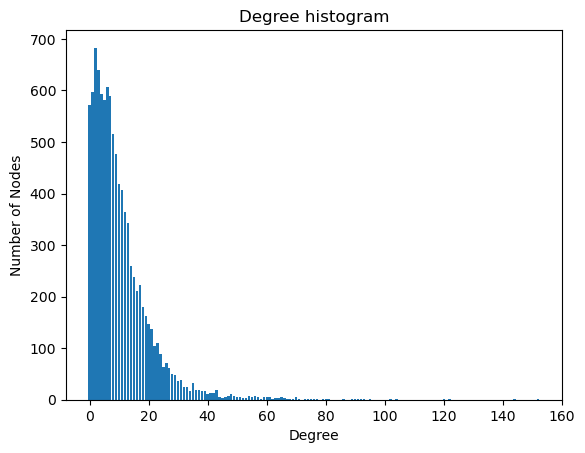

The Average Degree is: 10
The Hubs are: [2155511848, 2124087378, 2130509920, 2145747124, 2107080958, 2121531691, 2167898414, 2119565742, 2118877769, 2158592639, 2057175746, 2123825896, 2161410889, 2122646361, 2126512988, 2110325612, 2033419168, 2099741732, 2111308925, 2057012437, 2166982098, 2154956324, 2011039300, 2128381560, 2427881153, 1975846642, 2611939200, 2162919312, 2094204865, 2146502635, 2140833774, 2030536784, 1880262756, 2106525823, 2161969291, 1988790447, 2129201358, 2137983211, 2004617458, 2110425399, 2031454541, 2142144955, 2022508996, 1971784203, 2011662871, 2152761983, 2121927366, 1996360405, 2097089247, 2118978333, 2148043549, 2019363670, 1595575146, 1660390307, 2911964244, 2135035173, 2170654002, 2076118331, 2147880316, 2119896671, 2100235918, 2611515161, 2124386111, 2085261163, 2124222502, 2121601095, 2093191240, 2161381512, 2119799051, 2121863487, 2031489346, 2147717514, 1995444699, 2294059674, 1501500081, 1995903777, 2032210760, 2099057525, 2069959554, 2166559705,

In [23]:
from backend import *

name_graph = input("The Graph Name is: ")
functionality_1(sub_citation_graph, name_graph)

The name of graph selected is: Sub Collaboration Graph
The number of the nodes in the graph: 23163
The number of the edges in the graph: 139157
The Graph Density is: 0.000518757


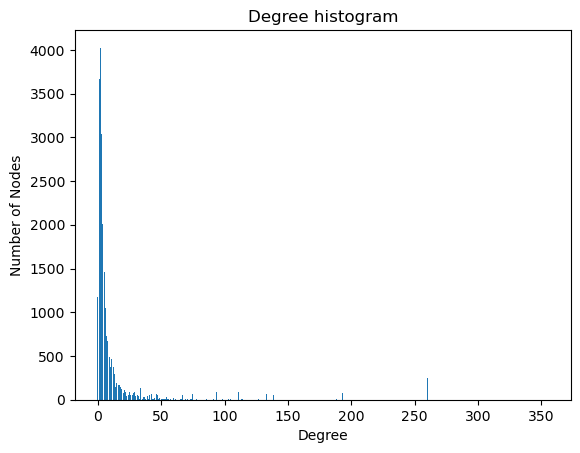

The Average Degree is: 12
The Hubs are: ['Q Lin', 'Christine L. Mummery', 'A. Maxwell Burroughs', 'Sebastien Jean', 'Shigehiro Yoshida', 'Frederic Bastien', 'CN Arighi', 'C Chen', 'Masayoshi Itoh', 'Thomas J. Ha', 'Jude Kendall', 'A Auchincloss', 'F Jungo', 'C Lachaize', 'Aron Marchler-Bauer', 'Bo Zhang', 'Donna Karolchik', 'Christian Sigrist', 'Simon Lefrancois', 'Kunal Talwar', 'Ross A. Overbeek', 'LG Castro', 'Diana Haddad', 'Silvia Zucchelli', 'Binsheng Zhao', 'Matthew D. Schultz', 'Kyle T. Siebenthall', 'Jordan A. Ramilowski', 'Michael C. Schatz', 'Mary C. Farach-Carson', 'L. Froidevaux', 'Alan Mackay-sim', 'Timothy R. Dreszer', 'L Yip', 'Carlos A. Silva', 'Berit Lilje', 'Matthew W. State', 'Chieko Kai', 'Alexander V. Favorov', 'Anjana R. Vatsan', 'Matthieu Devin', 'Shennan Lu', 'R.R. Lay', 'Michael Isard', 'Stefano Gustincich', 'J Zhang', 'Rolf Apweiler', 'M.C. Chavez', 'Michael F. Walker', 'W Liu', 'Emiliano Dalla', 'L Pureza', 'Brian Smith-White', 'Amaia Sangrador-Vegas', 'Alex

In [24]:
from backend import functionality_1

name_graph = input("The Graph Name is: ")
functionality_1(sub_collaboration_graph, name_graph)

#### Functionality 2 - Nodes' contribution

##### Input:
- The graph
- A node of the graph (paper/author)
- The name of the graph

##### Output:

- The centrality of the node, calculated based on the following centrality measurements:
    - Betweeness
    - PageRank
    - ClosenessCentrality
    - DegreeCentrality

In [26]:
from backend import functionality_2

#node_selected_collaboration = 2155511848

name_graph = input("The Graph Name is: ")
#node_selected = int(input("Insert the Node that the function calculated: "))
functionality_2(sub_citation_graph, node_selected=2155511848, name_graph=name_graph)

The name of graph selected is: Sub Citation Graph
The Betweenness Centrality of selected node is: 0.000145656
The PageRank Centrality of selected node is: 0.000350732
The Closeness Centrality of selected node is: 0.0288951
The Degree Centrality of selected node is: 0.0030003


#### Functionality 3 - Shortest ordered walk

##### Input:

- The graph data
- A sequence of authors_a = [a_2, ..., a_{n-1}]
- Initial node a_1 and an end node a_n
- *N*: denoting the top *N* authors whose data should be considered

##### Output:

- The shortest walk of collaborations you need to read to get from author a_1 to author a_n and the papers you need to cross to realize this walk.

In [ ]:
from backend import functionality_3

#### Functionality 4 - Disconnecting Graphs

##### Input:

- The graph data
- authorA: a paper to which will relate sub-graph G_a
- authorB: a paper to which will relate sub-graph G_b
- *N*: denoting the top *N* authors that their data should be considered

##### Output:

- The minimum number of edges (by considering their weights) required to disconnect the original graph in two disconnected subgraphs: G_a and G_b.

#### Functionality 5 - Extracting Communities

##### Input:

- The graph data
- *N*: denoting the top *N* papers that their data should be considered
- Paper_1: denoting the name of one of the papers
- Paper_2: denoting the name of one of the papers

##### Output:

- The minimum number of edges that should be removed to form communities
- A list of communities, each containing a list of papers that belong to them.
- Whether the Paper_1 and Paper_2 belongs to the same community.

### 2.2. Frontend Implementation

## 3. Bonus - PageRank on MapReduce

## 4. Command Line Question (CLQ)


## 5. Algorithmic Question (AQ)